In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing 

In [15]:
red_wine_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
wine = red_wine_original.copy()

In [16]:
wine['quality_label'] = wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


In [17]:
wine.drop_duplicates(inplace= True, ignore_index=True)

In [18]:
red_wine = wine.drop(["quality","sulphates","pH"], axis = 1)


In [19]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,9.4,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,9.8,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,9.8,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,9.8,medium
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,9.4,low
...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,9.5,medium
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,10.5,low
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,11.2,medium
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,10.2,low


In [20]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   alcohol               1359 non-null   float64
 9   quality_label         1359 non-null   object 
dtypes: float64(9), object(1)
memory usage: 106.3+ KB


In [21]:
cleanup_nums = {"quality_label":{"low": 0, "medium": 1,"high" : 2}}
red_wine = red_wine.replace(cleanup_nums)

In [22]:
red_wine.tail(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality_label
1259,7.0,0.655,0.16,2.1,0.074,8.0,25.0,0.99606,9.7,0
1260,6.8,0.680,0.21,2.1,0.070,9.0,23.0,0.99546,10.3,0
1261,6.0,0.640,0.05,1.9,0.066,9.0,17.0,0.99496,10.6,0
1262,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,11.4,0
1263,6.2,0.570,0.10,2.1,0.048,4.0,11.0,0.99448,10.8,1
...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,9.5,1
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,10.5,0
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,11.2,1
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,10.2,0


In [23]:
red_wine['quality_label'] = red_wine.quality_label.astype('category')

In [24]:
X = red_wine.drop(["quality_label"], axis = 1)
y = red_wine["quality_label"]

In [25]:
# K Fold cross validation :
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split

kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
    y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1087, Test set:272
Fold:2, Train set: 1087, Test set:272
Fold:3, Train set: 1087, Test set:272
Fold:4, Train set: 1087, Test set:272
Fold:5, Train set: 1088, Test set:271


In [26]:
#Logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
model1 = linear_model.LogisticRegression(max_iter=5000)
score = cross_val_score(model1, X, y, cv= kf)
print(f'Scores for each fold: {score}')

# Calculate the mean accuracy across all folds
mean_accuracy_log = np.mean(score)
print("Mean Accuracy:", mean_accuracy_log)

Scores for each fold: [0.74264706 0.75735294 0.71323529 0.70955882 0.72324723]
Mean Accuracy: 0.7292082700238767


In [27]:
#Decisiontree

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
score = cross_val_score(model2, X, y, cv= kf)
print(f'Scores for each fold: {score}')

# Calculate the mean accuracy across all folds
mean_accuracy_dt = np.mean(score)
print("Mean Accuracy:", mean_accuracy_dt)

Scores for each fold: [0.62132353 0.65073529 0.62867647 0.625      0.66789668]
Mean Accuracy: 0.6387263946168873


In [28]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
score = cross_val_score(model3, X, y, cv= kf)
print(f'Scores for each fold: {score}')

# Calculate the mean accuracy across all folds
mean_accuracy_rf = np.mean(score)
print("Mean Accuracy:", mean_accuracy_rf)

Scores for each fold: [0.74632353 0.77205882 0.70955882 0.72426471 0.69741697]
Mean Accuracy: 0.7299245713045366


In [29]:
#Using KNeighborsClassifier
  
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
score = cross_val_score(model4, X, y, cv= kf)
print(f'Scores for each fold: {score}')

# Calculate the mean accuracy across all folds
mean_accuracy_kn = np.mean(score)
print("Mean Accuracy:", mean_accuracy_kn)

Scores for each fold: [0.58088235 0.63235294 0.59558824 0.63970588 0.62730627]
Mean Accuracy: 0.6151671369654873


In [30]:
#Predicting the values for test
forest = RandomForestClassifier()
forest.fit(X_train, y_train.ravel())
y_pred = forest.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1])

In [31]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to search for the best hyperparameters

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=kf, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       129
           1       0.72      0.75      0.73       138
           2       0.00      0.00      0.00         4

    accuracy                           0.72       271
   macro avg       0.48      0.49      0.48       271
weighted avg       0.71      0.72      0.71       271



/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Hyperparameter tuning for RandomForestClassifier :

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report


# Define the Random Forest Classifier model
rf_model = RandomForestClassifier()

# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       129
           1       0.70      0.70      0.70       138
           2       0.00      0.00      0.00         4

    accuracy                           0.69       271
   macro avg       0.46      0.47      0.47       271
weighted avg       0.68      0.69      0.69       271



/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[91, 38,  0],
       [41, 97,  0],
       [ 0,  4,  0]])

In [34]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       129
           1       0.70      0.70      0.70       138
           2       0.00      0.00      0.00         4

    accuracy                           0.69       271
   macro avg       0.46      0.47      0.47       271
weighted avg       0.68      0.69      0.69       271



/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurpreetsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


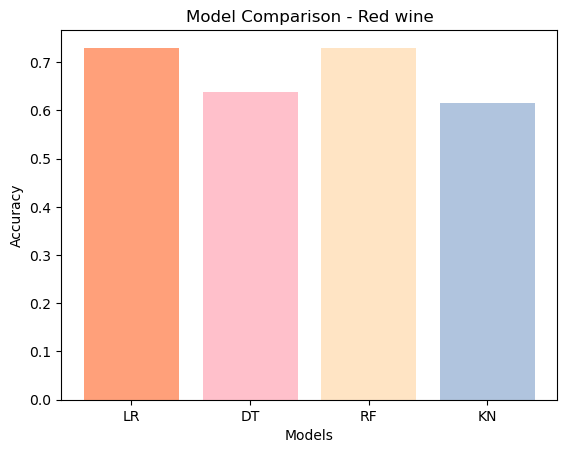

In [35]:
# Example model comparison plot

models = ['LR', 'DT', 'RF','KN']
accuracies = [mean_accuracy_log, mean_accuracy_dt, mean_accuracy_rf,mean_accuracy_kn]
plt.bar(models, accuracies, color=['lightsalmon', 'pink', 'bisque','lightsteelblue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Red wine')
plt.show()

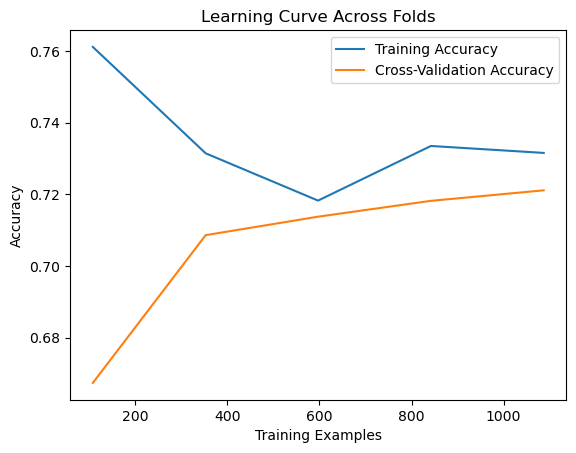

In [36]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model1, X, y, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve Across Folds')
plt.legend(loc='best')
plt.show()

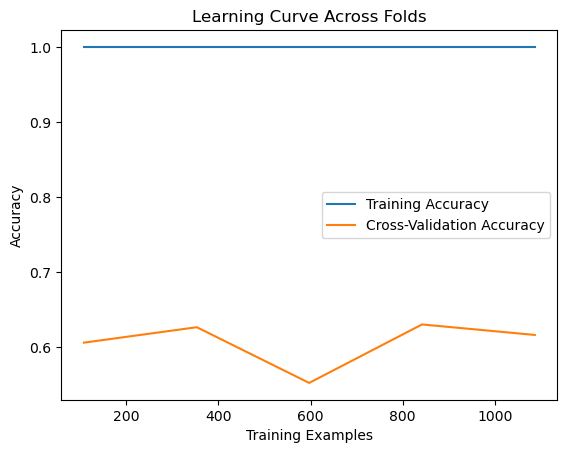

In [37]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model2, X, y, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve Across Folds')
plt.legend(loc='best')
plt.show()

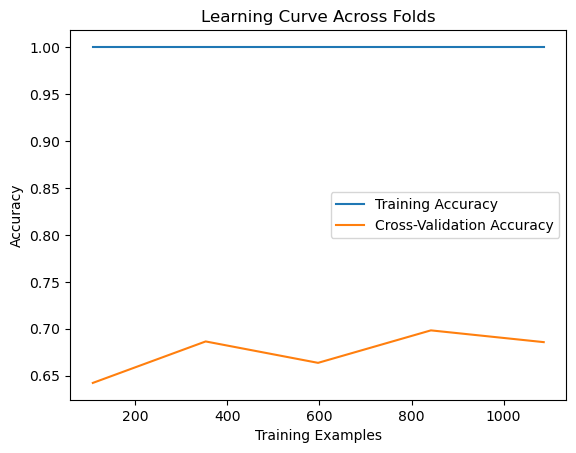

In [38]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model3, X, y, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve Across Folds')
plt.legend(loc='best')
plt.show()

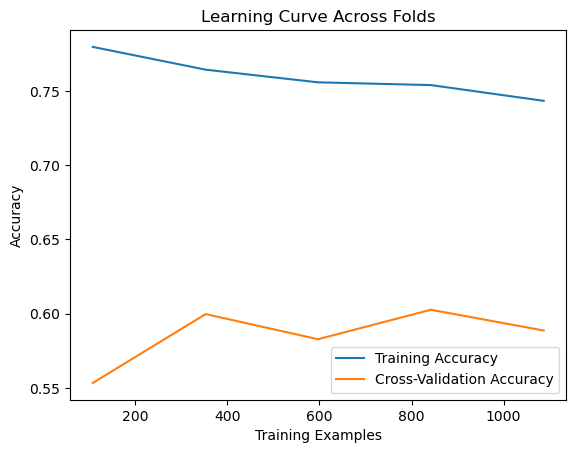

In [39]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model4, X, y, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve Across Folds')
plt.legend(loc='best')
plt.show()

In [40]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

def generate_confusion_matrix(model, X, y, cv=5):
    """
    Generate confusion matrix using K-fold cross-validation.

    Parameters:
    - model: Machine learning model (e.g., RandomForestClassifier, DecisionTreeClassifier, LogisticRegression)
    - X: Feature matrix
    - y: Target variable
    - cv: Number of folds for cross-validation (default: 5)

    Returns:
    - Confusion matrix
    """
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    all_actual = []
    all_predicted = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Collect actual and predicted values
        all_actual.extend(y_test)
        all_predicted.extend(y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(all_actual, all_predicted)
    return conf_matrix

# Example usage with RandomForestClassifier
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_conf_matrix = generate_confusion_matrix(rf_model, X, y)
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_conf_matrix = generate_confusion_matrix(dt_model, X, y)
print("\nDecision Tree Confusion Matrix:")
print(dt_conf_matrix)

# Logistic Regression
lr_model = LogisticRegression(max_iter=5000)
lr_conf_matrix = generate_confusion_matrix(lr_model, X, y)
print("\nLogistic Regression Confusion Matrix:")
print(lr_conf_matrix)

#Using KNeighborsClassifier
kn_model = KNeighborsClassifier()
kn_conf_matrix = generate_confusion_matrix(kn_model, X, y)
print("\nKNeighbors Confusion Matrix:")
print(kn_conf_matrix)


Random Forest Confusion Matrix:
[[470 170   0]
 [177 523   2]
 [  0  17   0]]

Decision Tree Confusion Matrix:
[[405 232   3]
 [225 463  14]
 [  1  15   1]]

Logistic Regression Confusion Matrix:
[[478 162   0]
 [189 513   0]
 [  0  17   0]]

KNeighbors Confusion Matrix:
[[399 241   0]
 [265 437   0]
 [  3  14   0]]


In [52]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier
feature_names = [f"feature {i}" for i in range(X.shape[1])]

X_train_df = pd.DataFrame(X_train, columns=feature_names)

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_df, y_train)

ValueError: Shape of passed values is (750, 10), indices imply (750, 3)

In [56]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.039 seconds


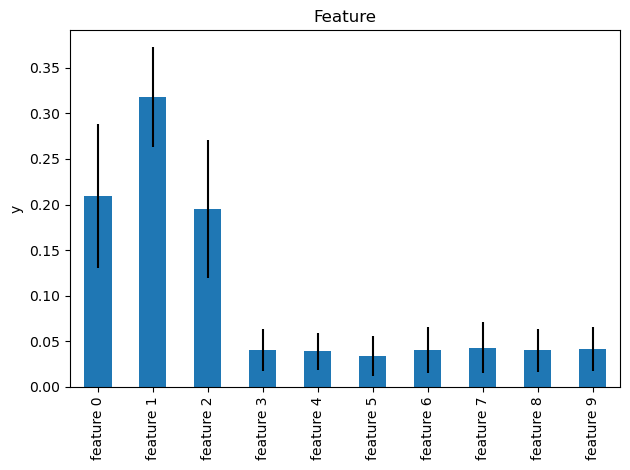

In [57]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature")
ax.set_ylabel("y")
fig.tight_layout()